# This is a Marketing dataset. 
## The target is clustering the clients for marketing purposes.
## We are going to use KMeans, besides PCA and autoencoders.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


* CUSTID: Customer ID.
* BALANCE: Bank account balance.
* BALANCE_FREQUENCY: Balance update frequency. Between 0 and 1 (1 = frequently, 0 = not frequently).
* PURCHASES: Purchases made from the account.
* ONEOFFPURCHASES: Biggest purchase from the account in one time.
* INSTALLMENTS_PURCHASES: Purchases made with installments.
* CASH_ADVANCE: Advance granted to the user.
* PURCHASES_FREQUENCY: Purchases frequency. Between 0 and 1 (1 = frequently, 0 = not frequently).
* ONEOFF_PURCHASES_FREQUENCY: One off purchase frequenzy. Between 0 and 1 (1 = frequently, 0 = not * frequently).
* PURCHASES_INSTALLMENTS_FREQUENCY: Installments purchase frequenzy. Between 0 and 1 (1 = frequently, 0 = not frequently).
* CASH_ADVANCE_FREQUENCY: How often is paid in advance. Between 0 and 1 (1 = frequently, 0 = not frequently).
* CASH_ADVANCE_TRX: Transactions made with cash advance.
* PURCHASES_TRX: Purchase transactions.
* CREDIT_LIMIT: Credit limit for the client.
* PAYMENTS: Number of paids made by the client.
* MINIMUM_PAYMENTS: Minimum number of payments made by the client.
* PRC_FULL_PAYMENT: Percentage of the total payment paid by the client.
* TENURE: Yeats using the credit card service by the client.

In [3]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

We can see all the variables are numeric, except the CUST_ID. <br> Lets check if we have missing data.

In [5]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We have 313 missing data in 'MINIMUM_PAYMENTS'  and 1 data in 'CREDIT LIMIT'.
<br>In this case, we are going to fill this data with the column mean.
<br>We are also going to drop 'CUST_ID' column, as it didnt give us any relevant data.

In [6]:
# Replacing null data in 'MINIMUM_PAYMENTS' with the mean.
creditcard_df.loc[creditcard_df['MINIMUM_PAYMENTS'].isnull() == True, 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

# Replacing null data in 'CREDIT_LIMIT' with the mean.
creditcard_df.loc[creditcard_df['CREDIT_LIMIT'].isnull() == True, 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

# Drop 'CUST_ID'.
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [7]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Lets visualize the data.

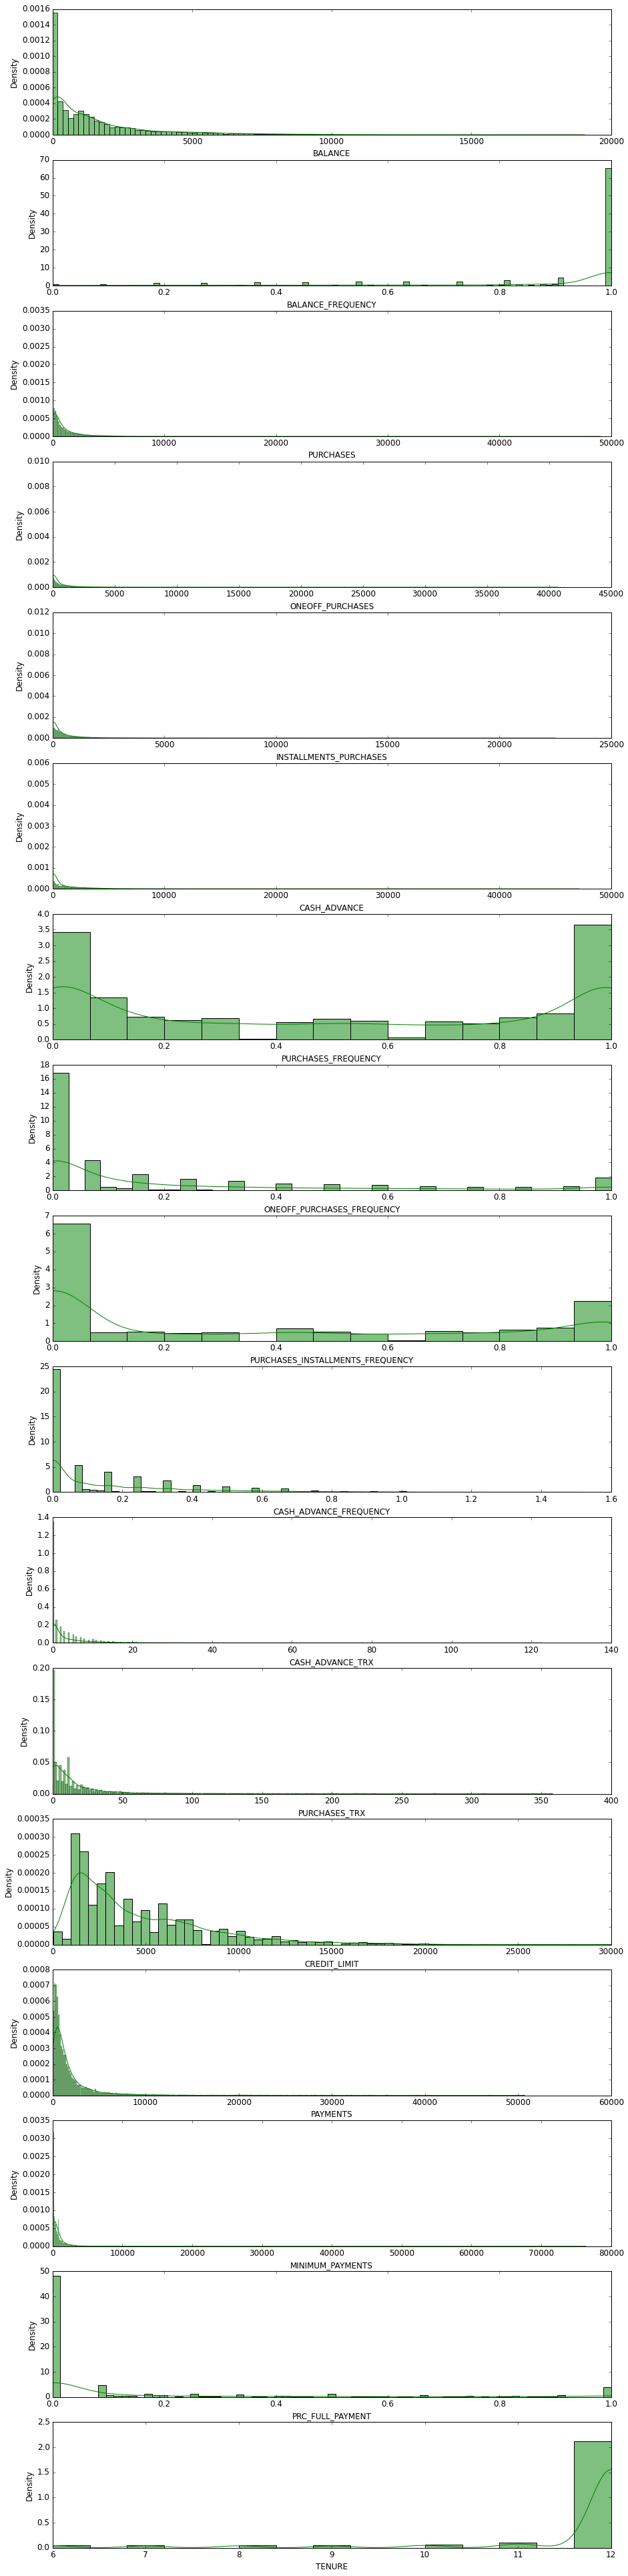

In [8]:
plt.figure(figsize = (15, 70))
plt.style.use('classic')

for i in range(len(creditcard_df.columns)):
    plt.subplot(len(creditcard_df.columns), 1, i+1)
    sns.histplot(data=creditcard_df[creditcard_df.columns[i]], stat='density', color='green', kde=True)

* Mean 'BALANCE' ~  1500 USD.
* 'BALANCE_FREQUENCY' for almost all clients ~1.
* For 'PURCHASES_FREQUENCY', there are 2 types of clients.
* For fields 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY', more users are in the middle.
* Very few clients use 'CASH_ADVANCE_FREQUENCY' often.
* Very few clients pay their debt in full 'PRC_FULL_PAYMENT' ~ 0.
* 'CREDIT_LIMIT' ~ 4500 USD.
* 'TENURE' ~ 12years.

<AxesSubplot:>

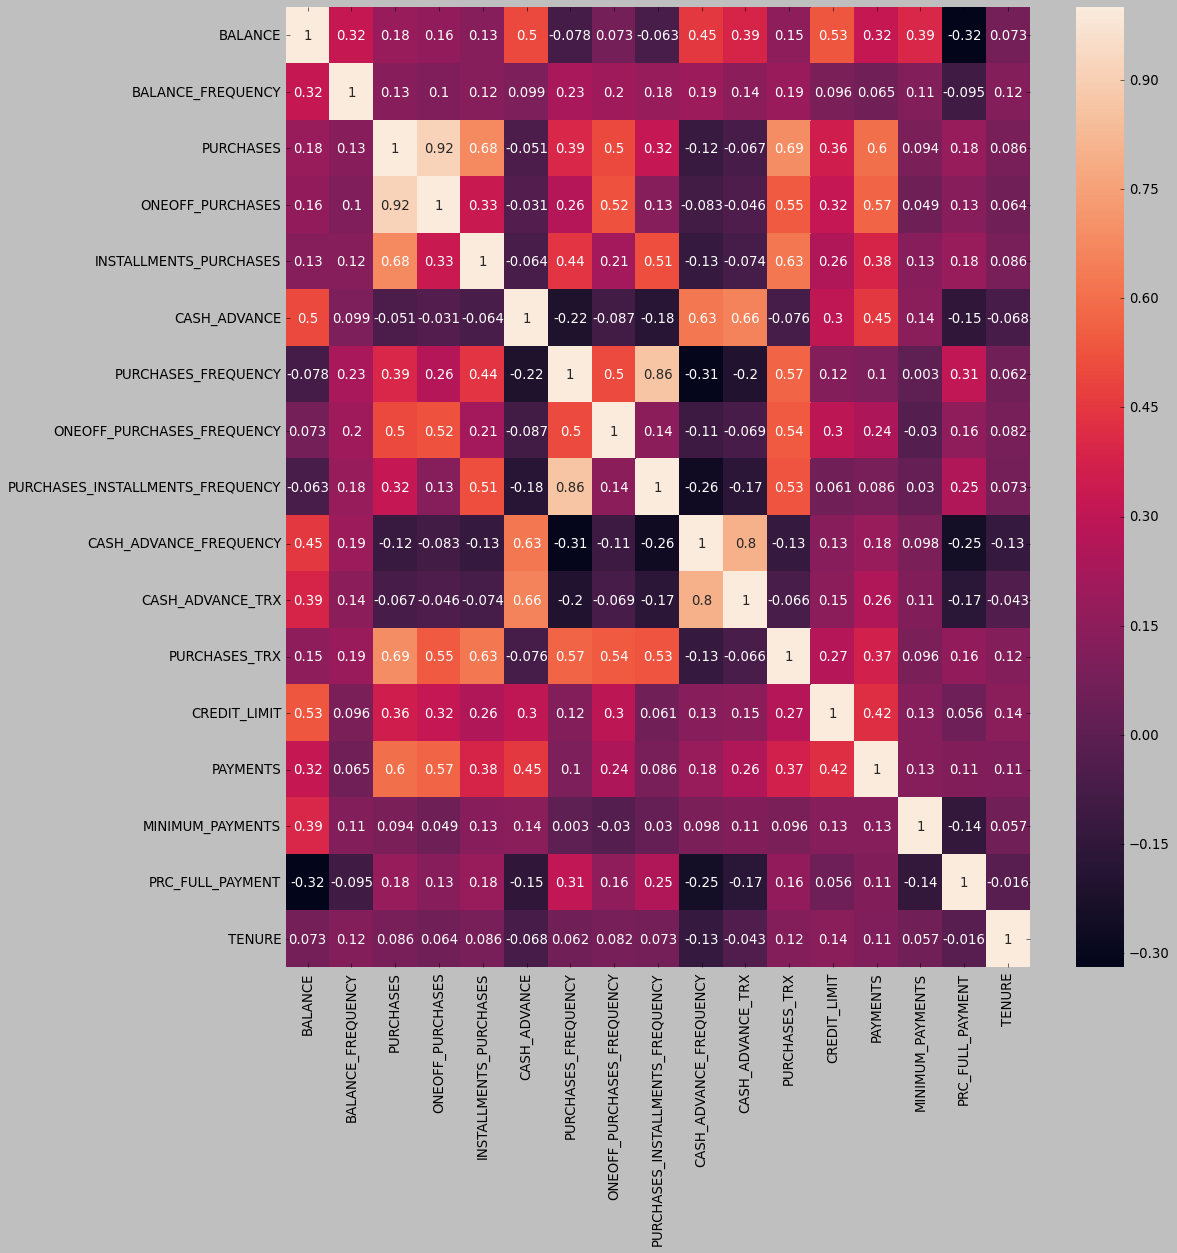

In [9]:
correlations = creditcard_df.corr()
plt.style.use('classic')
plt.figure(figsize = (15,15))
sns.heatmap(correlations, annot=True)

* 'PURCHASES' correlation is stronger with 'ONE_OFF_PURCHASES' than 'INSTALLMENTS_PURCHASES'
* 'PURCHASES_FREQUENCY' correlation is stronger with 'PURCHASES_INSTALLMENTS_FREQUENCY' than 'ONEOFF_PURCHASES_FREQUENCY'


In [10]:
# Before starting modeling, lets scale our data.
# We are going to use a standard scaler.

scaler = StandardScaler()

creditcard_df_scaled = scaler.fit_transform(creditcard_df)

print('Shape of creditcard_df:', creditcard_df.shape)
print('Shape of creditcard_df_scaled:', creditcard_df_scaled.shape)

Shape of creditcard_df: (8950, 17)
Shape of creditcard_df_scaled: (8950, 17)


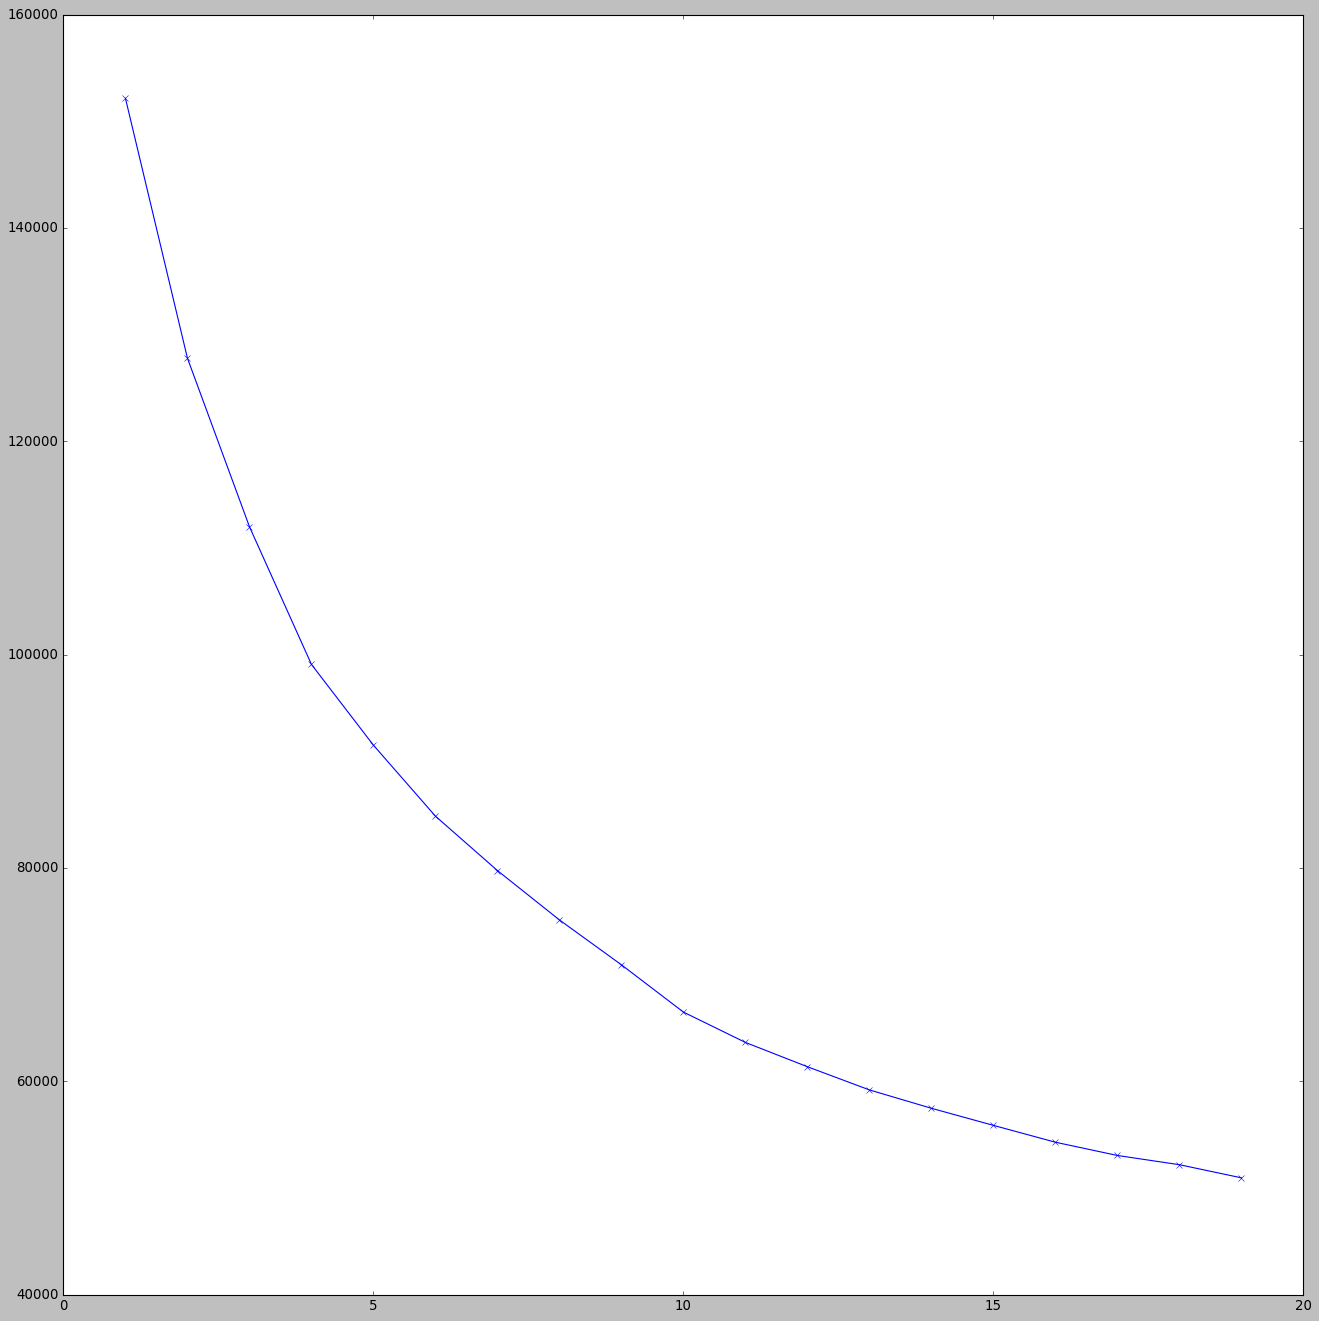

In [11]:
# Elbow method

scores_1 = []

range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.figure(figsize=(20,20))
plt.plot(range_values, scores_1, 'bx-')
plt.style.use('classic')

From 8 clusters, it became almost a straight line, so we are gonna use 8 clusters.


## KMeans

In [12]:
# Start KMeans with 8 clusters
kmeans = KMeans(8)

# Fit our data scaled
kmeans.fit(creditcard_df_scaled)

# Get the labels and the cluster centers
labels = kmeans.labels_

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])         
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,266.075424,0.236063,11.783898
1,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
2,1220.514994,0.970178,1971.792676,1576.972447,394.820228,278.637458,0.868943,0.762808,0.399814,0.053566,1.042009,27.727854,5853.677875,1983.717894,485.262318,0.272564,11.866667
3,805.220083,0.956301,923.338824,186.885283,736.896637,216.408238,0.887954,0.086985,0.843765,0.040044,0.784226,19.374504,3545.099307,1105.280930,788.094852,0.245510,11.862103
4,5099.393953,0.970392,542.864477,335.950907,207.031791,5226.790667,0.301134,0.139661,0.201826,0.519523,16.497674,8.169767,8279.016913,4131.114001,2163.092995,0.038965,11.612791
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,1605.047605,0.972774,230.077907,182.515426,47.744156,797.223294,0.142179,0.079994,0.062922,0.158283,3.107562,2.608297,3384.275575,1014.718178,844.603245,0.020204,11.881057
7,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904


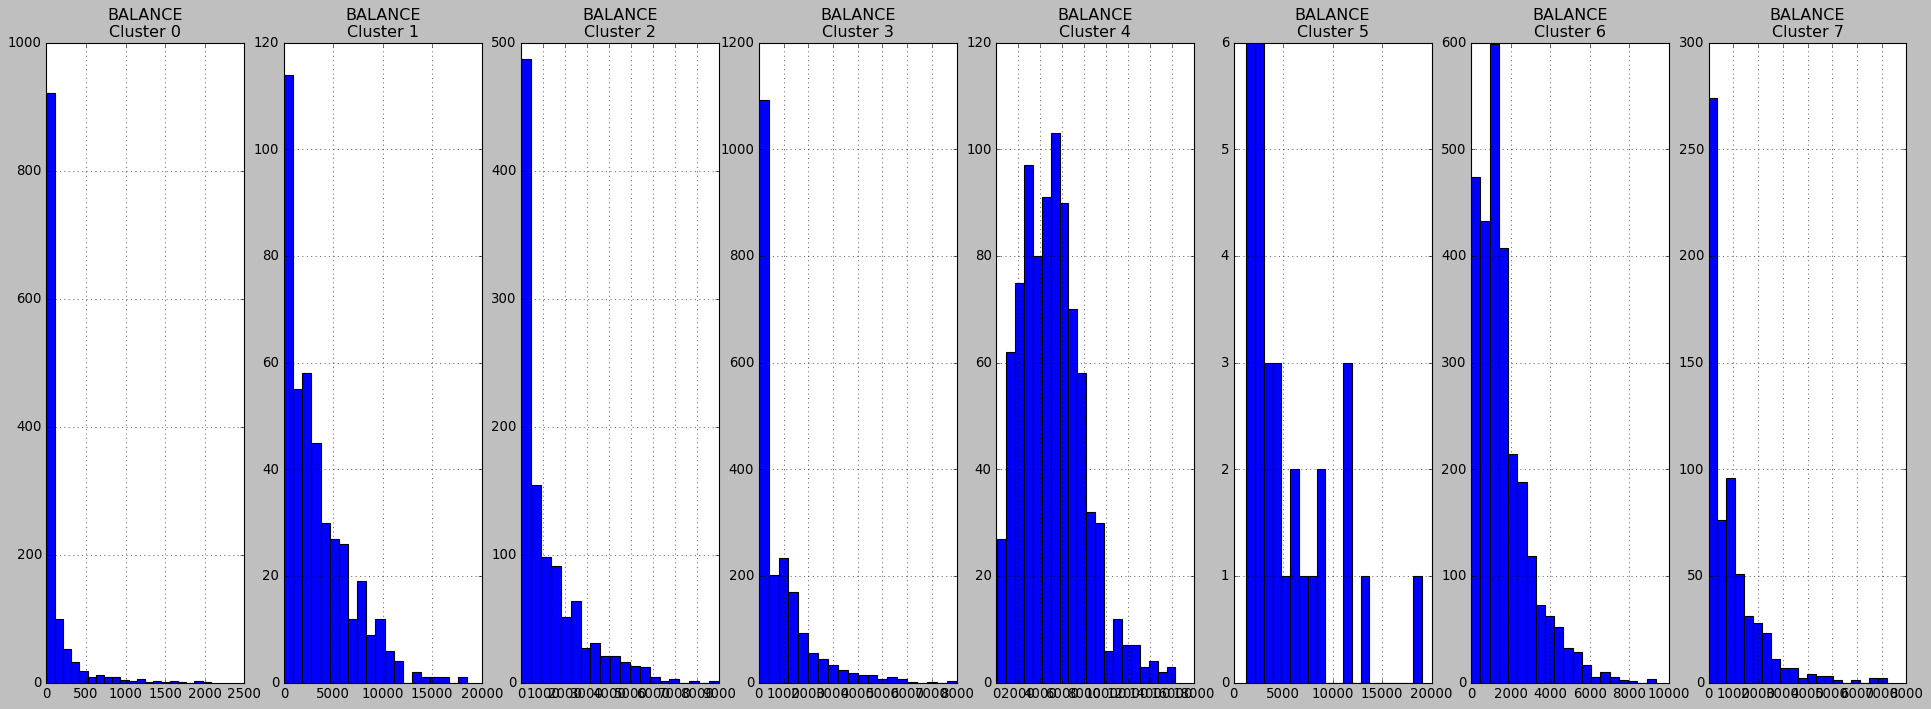

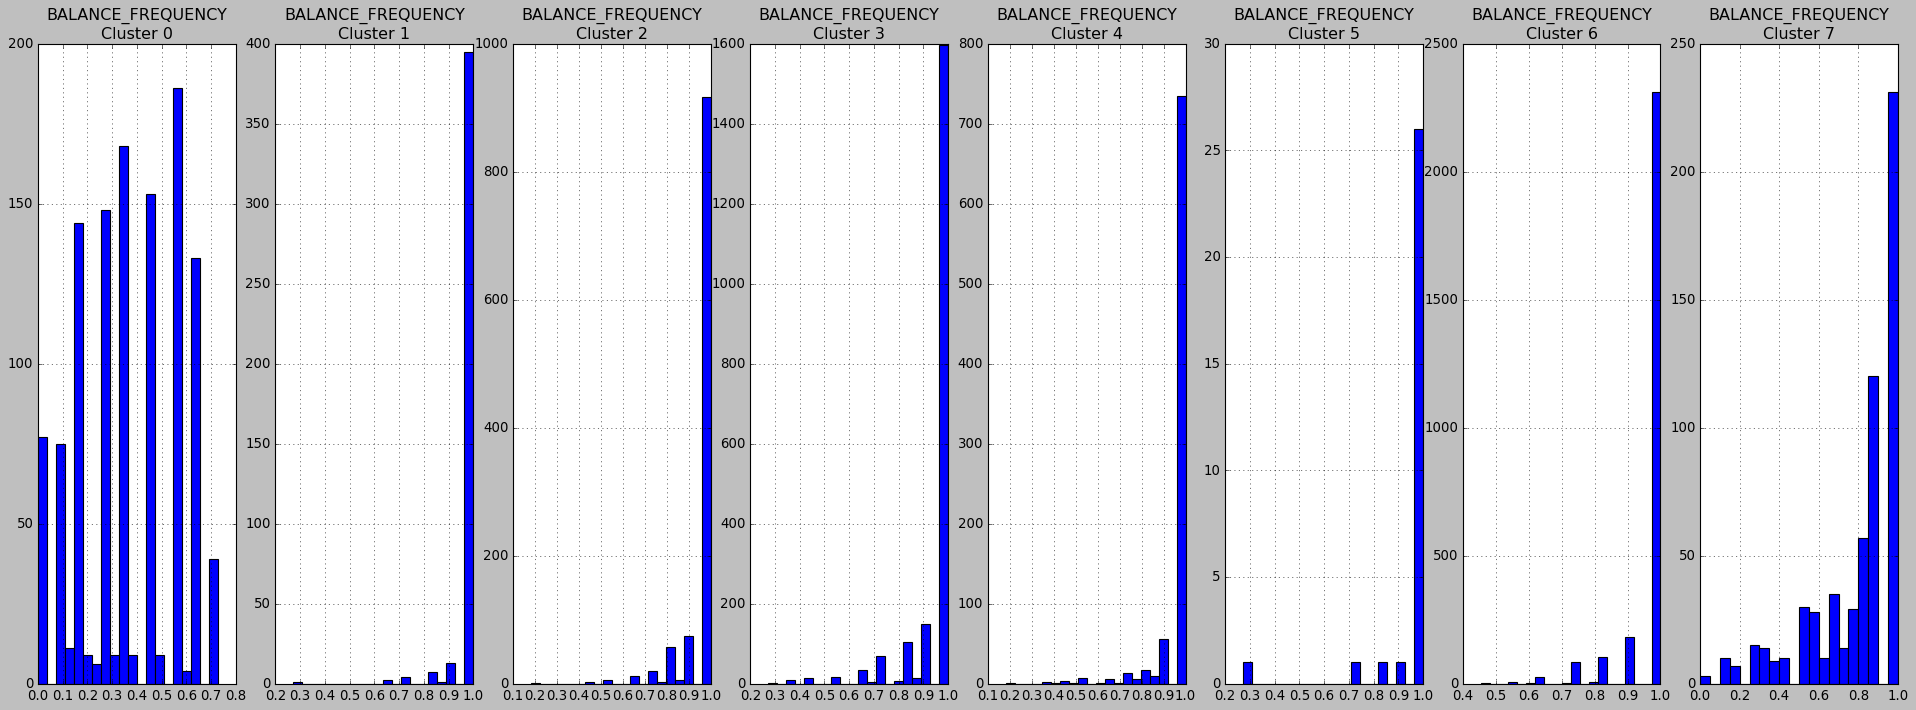

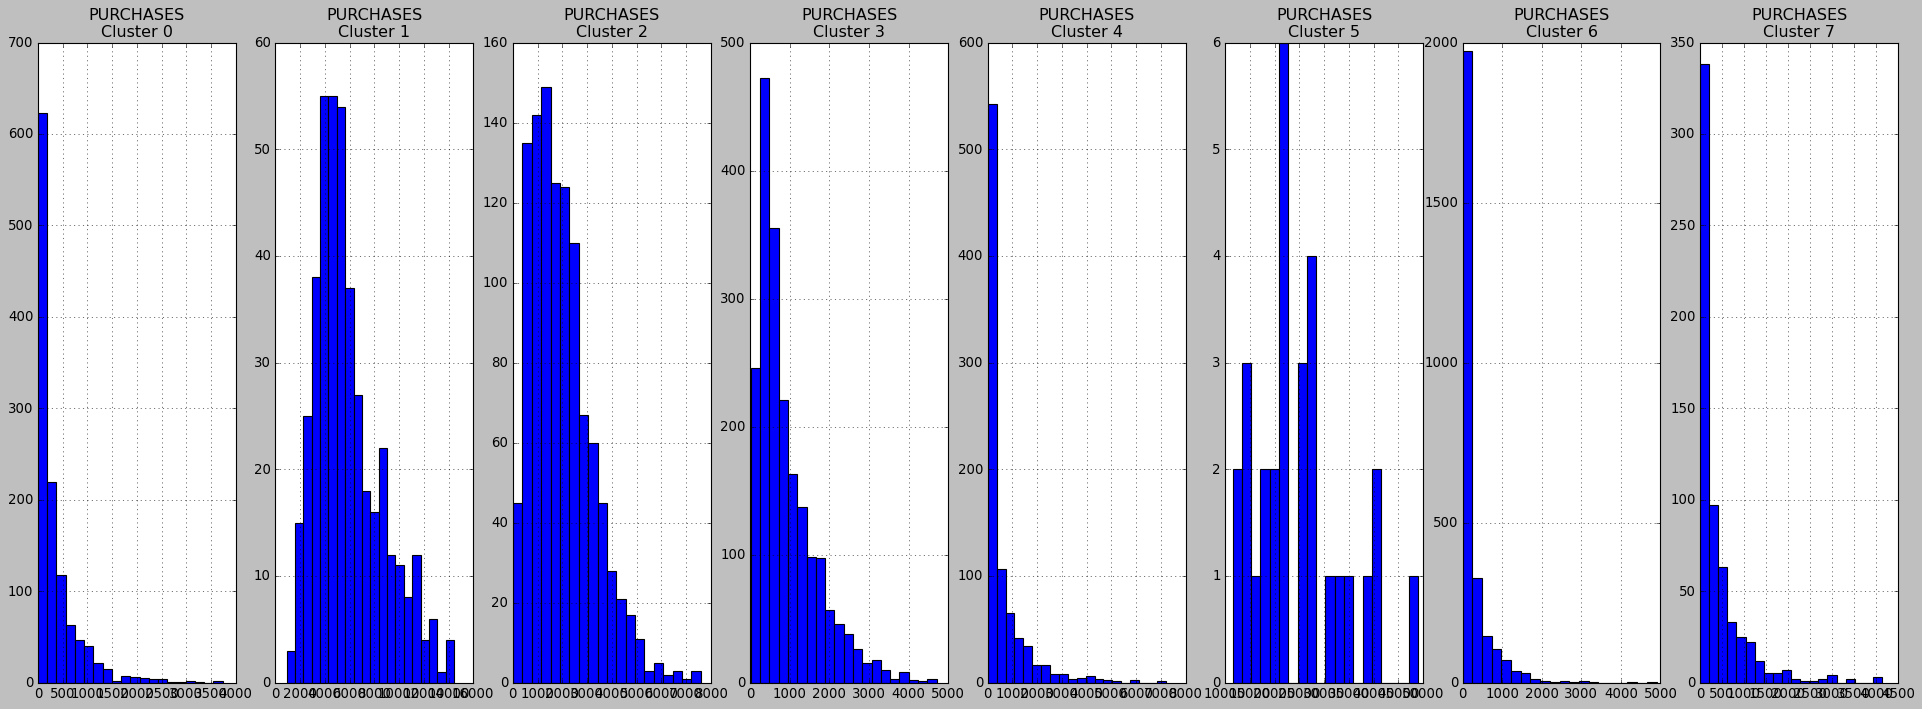

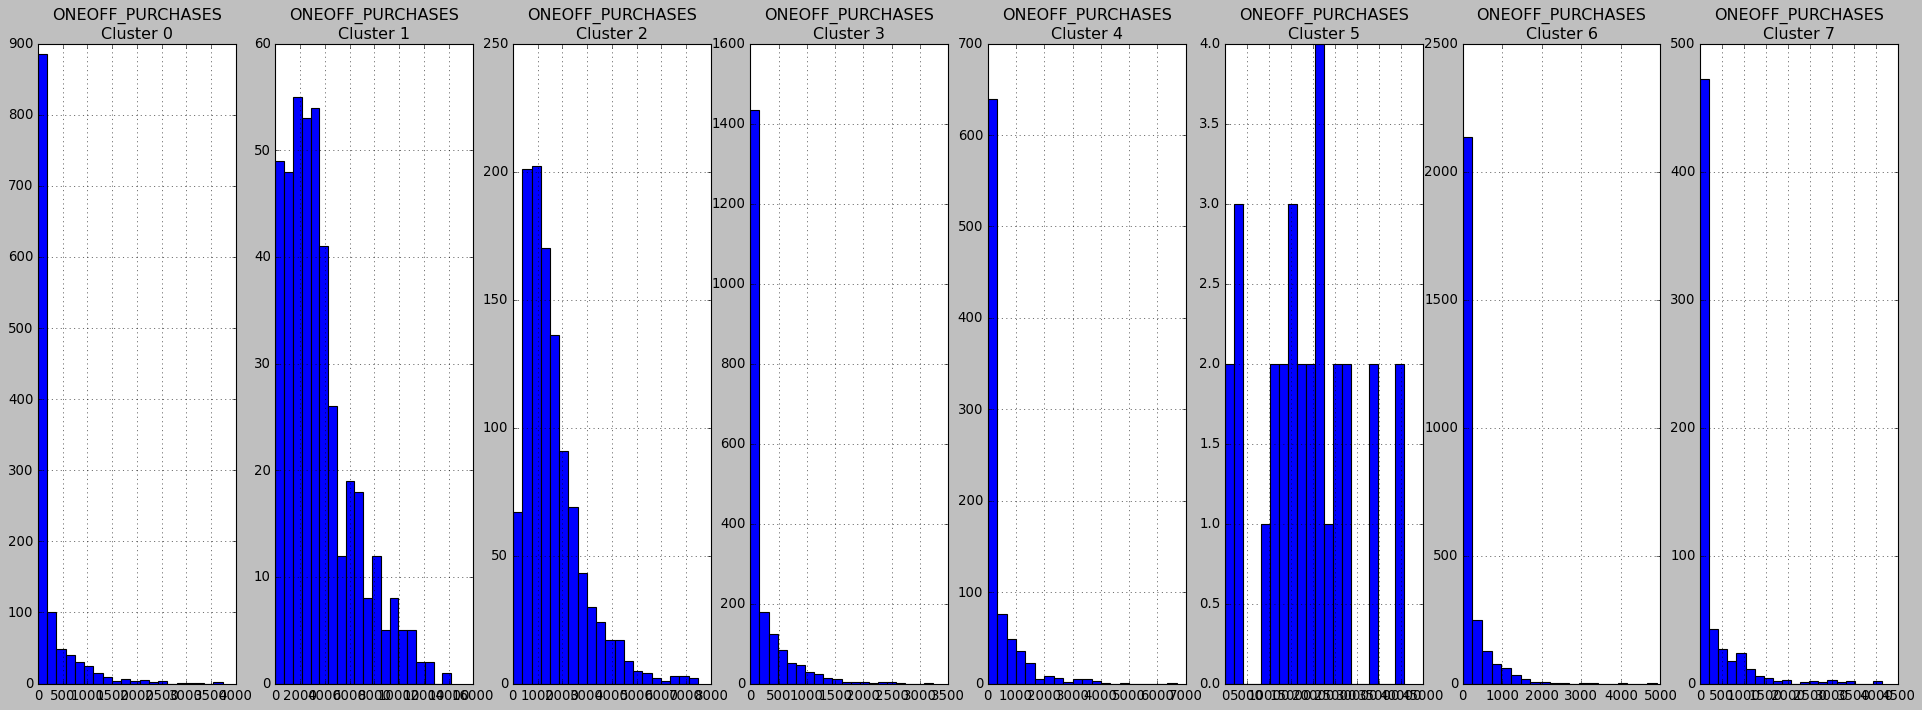

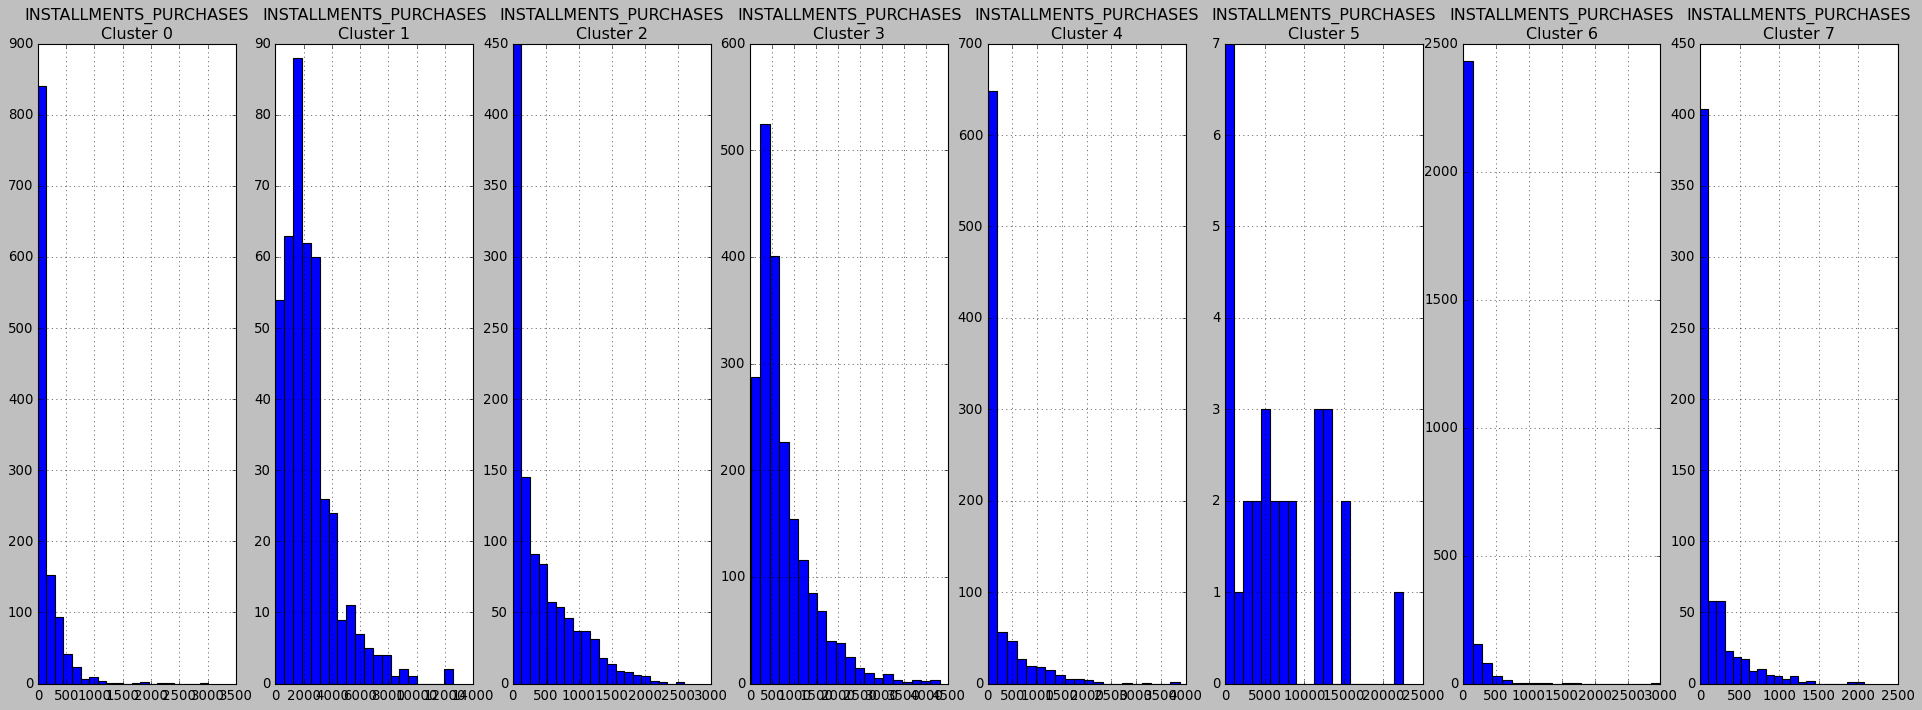

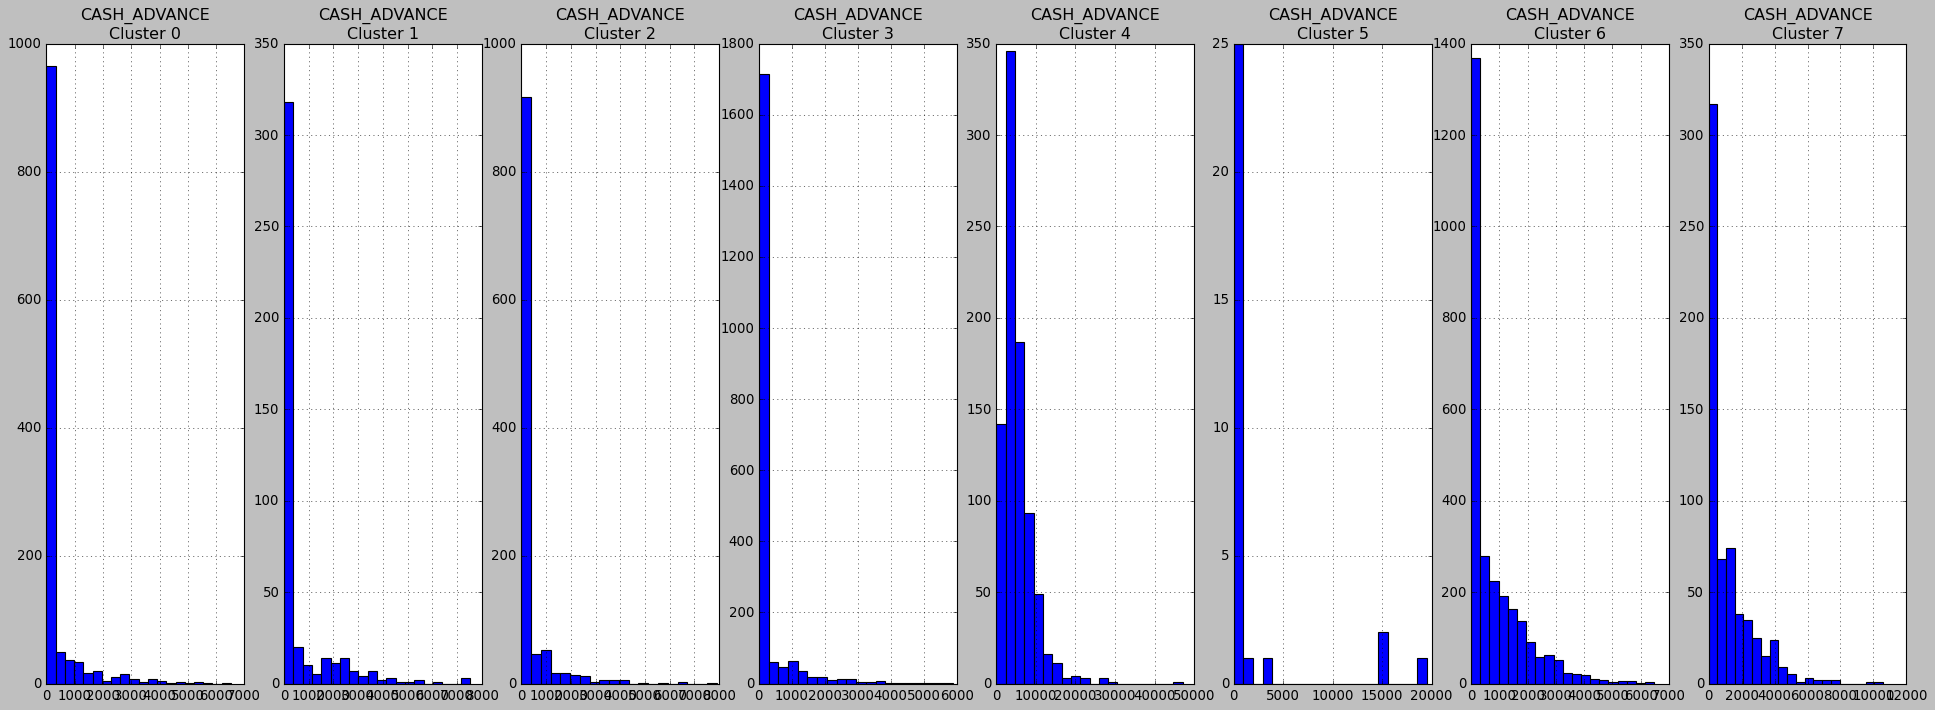

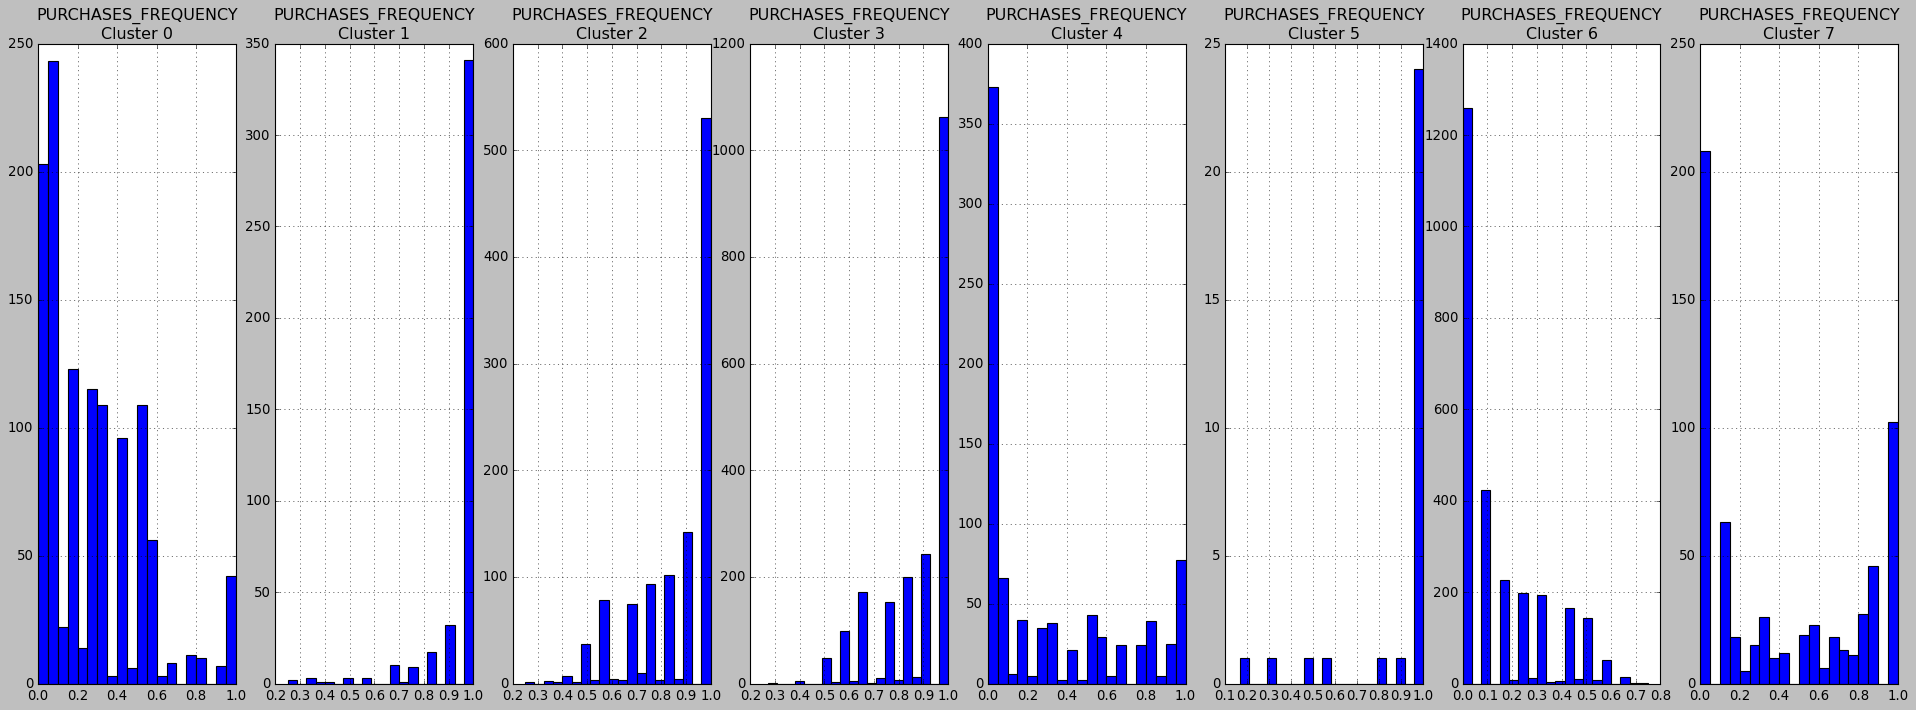

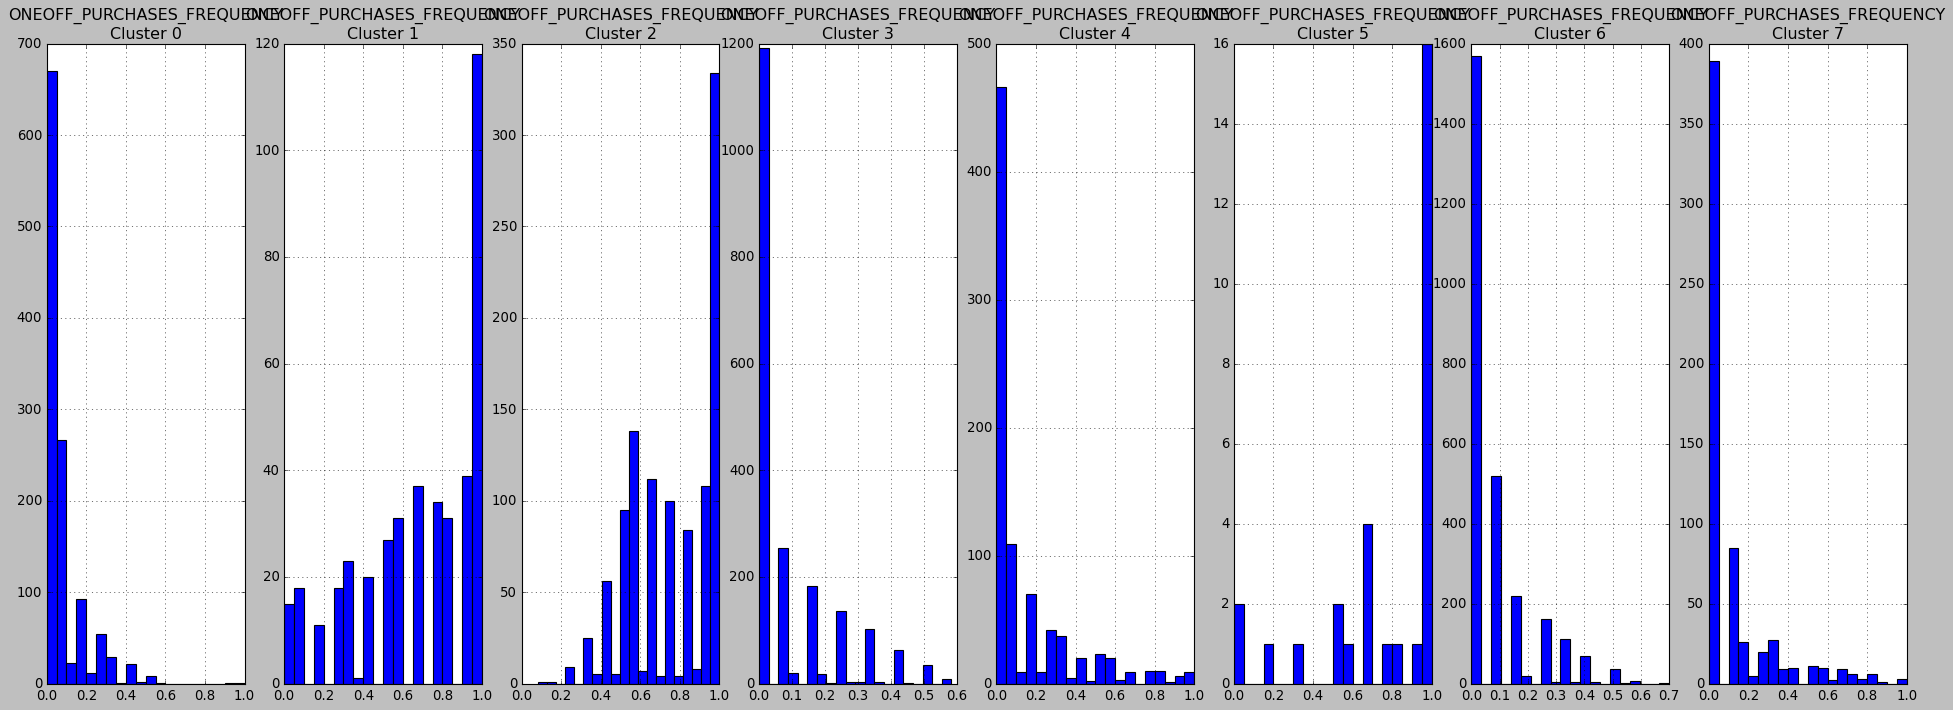

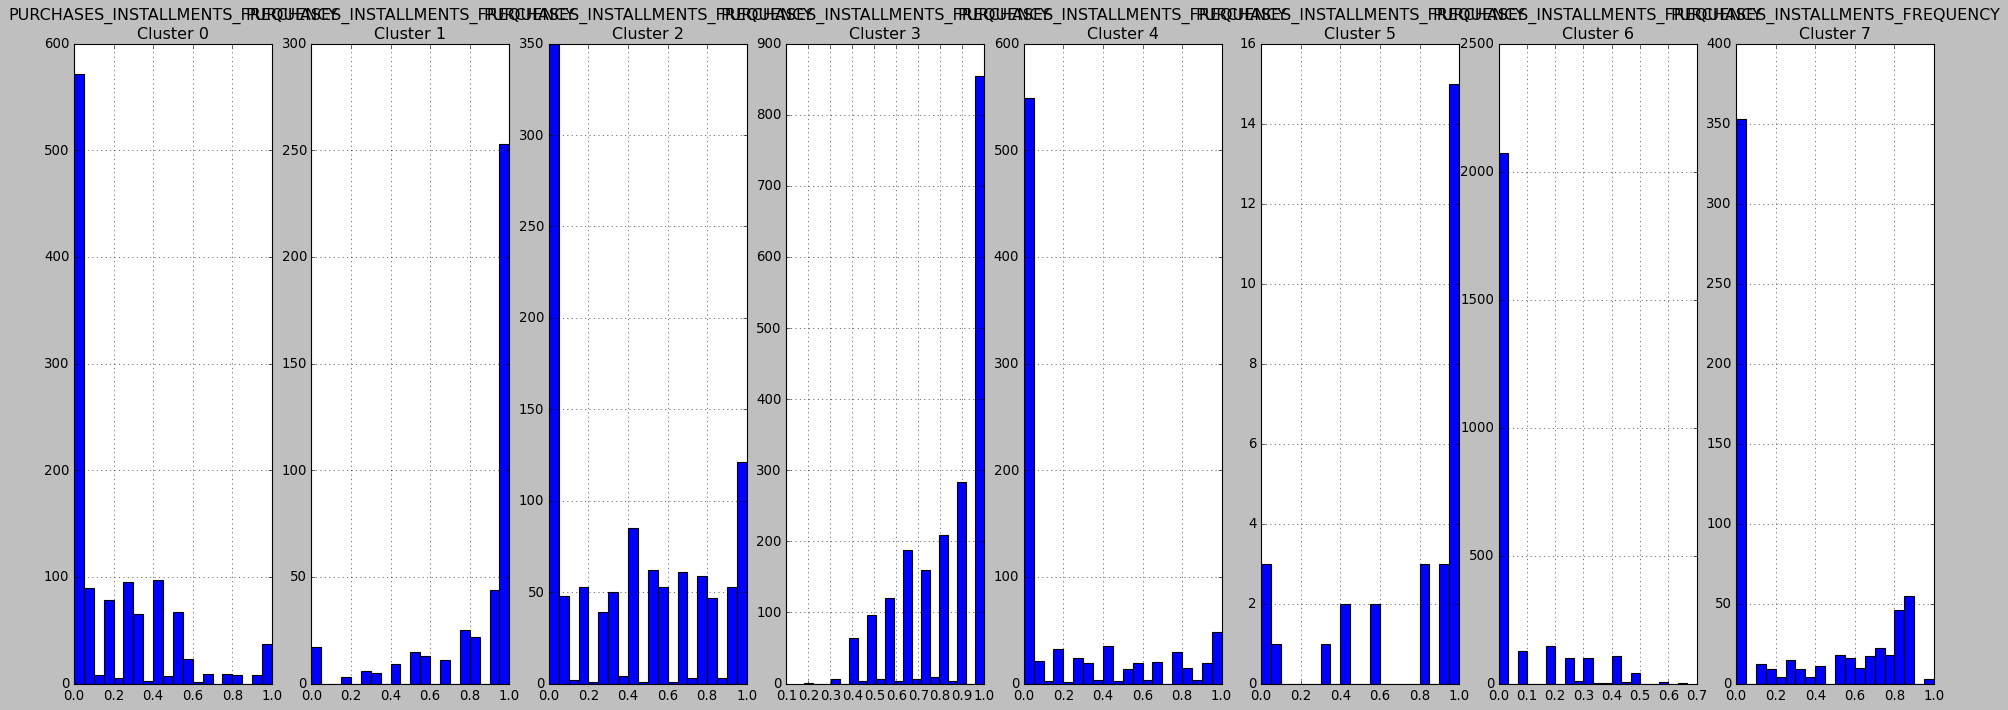

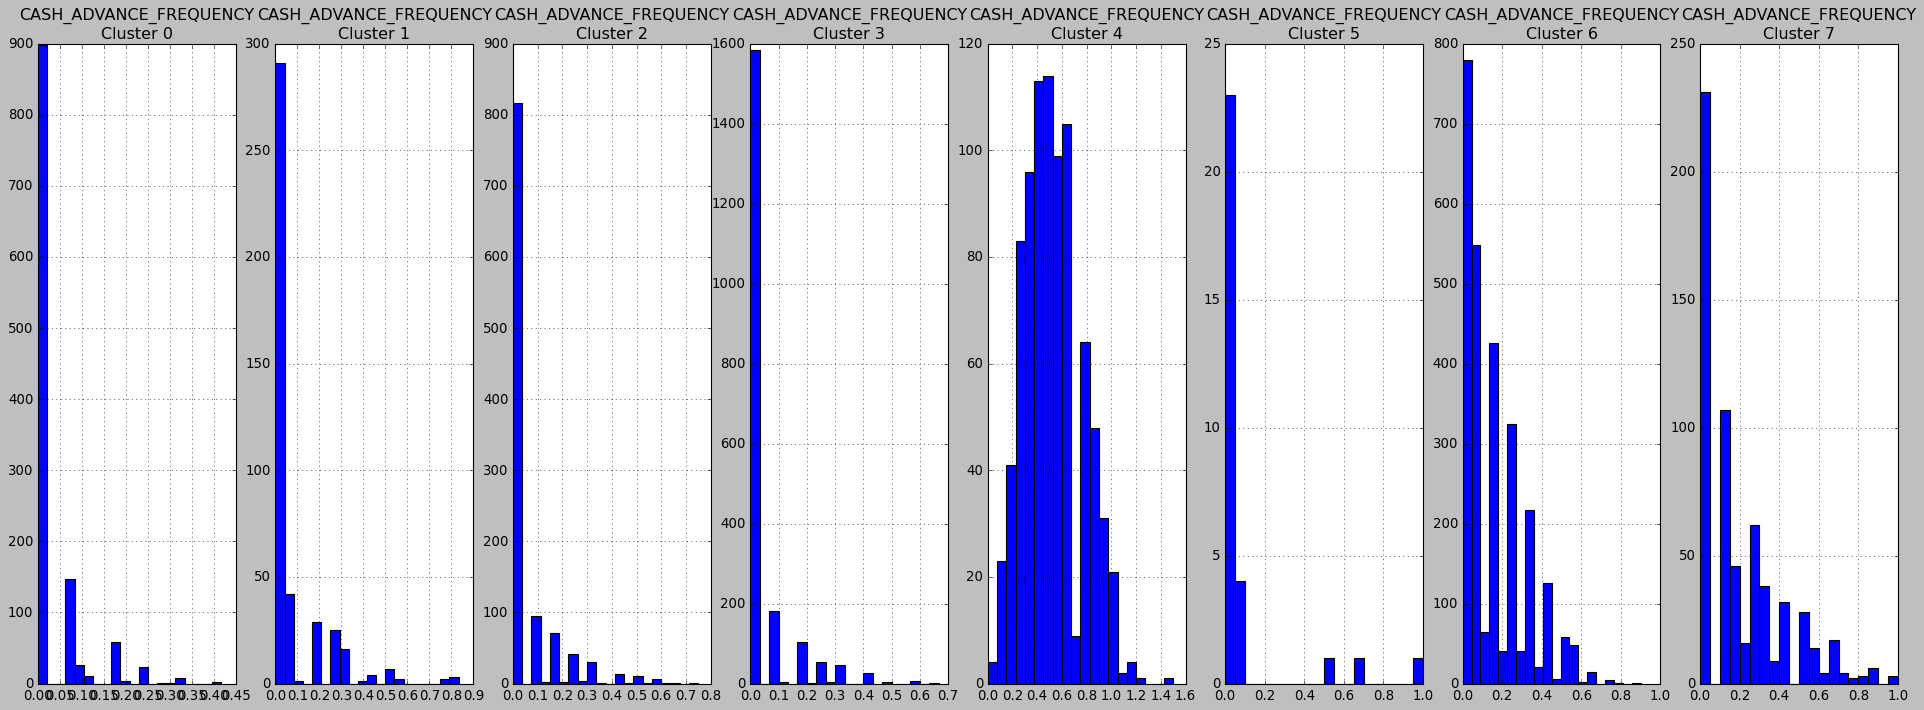

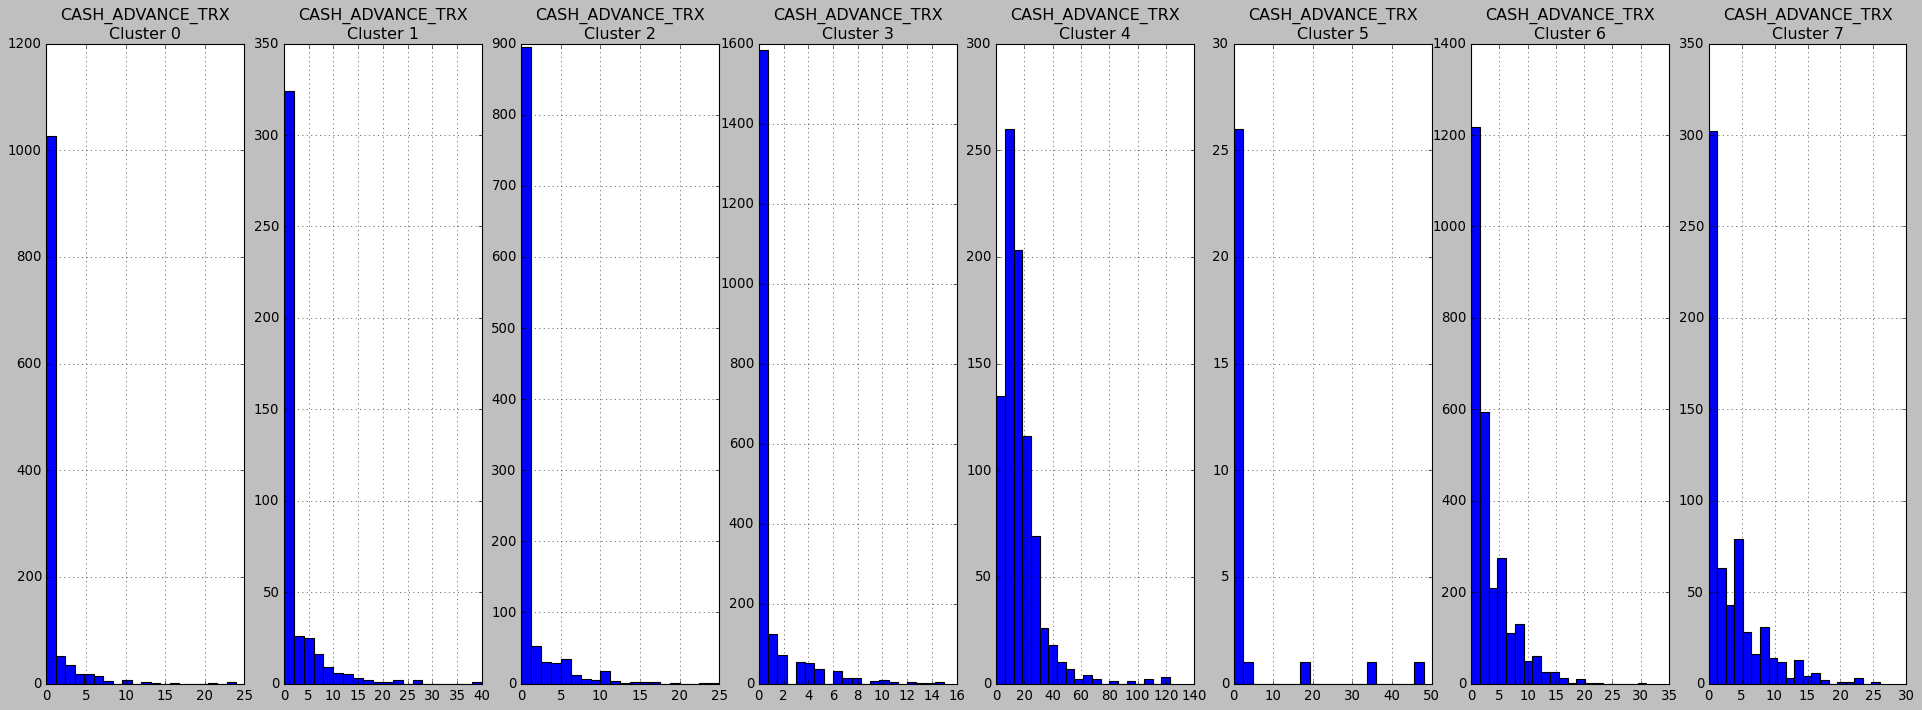

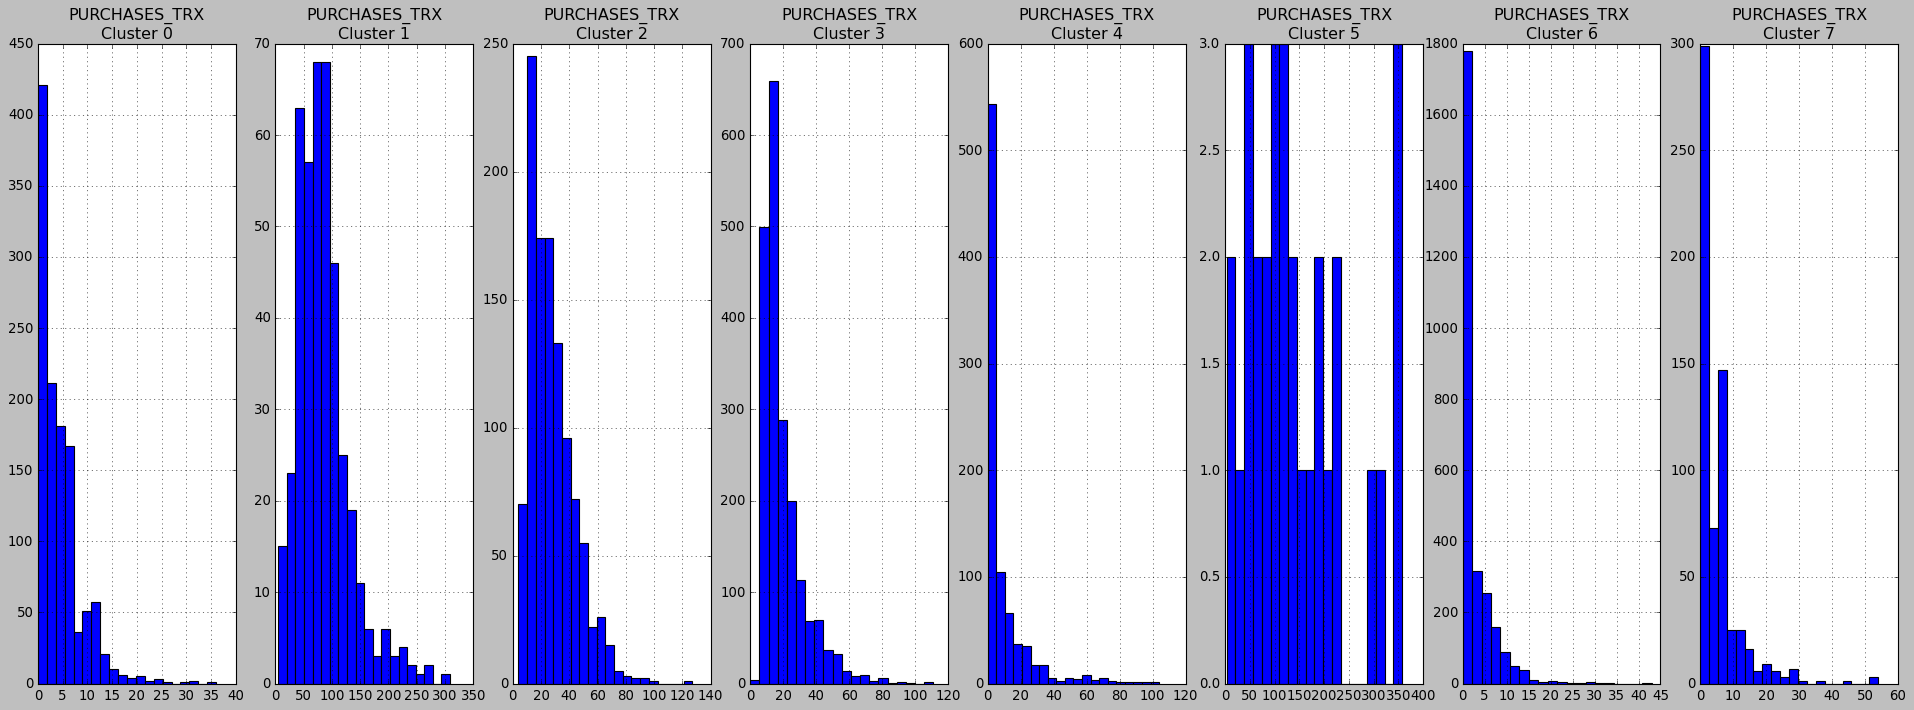

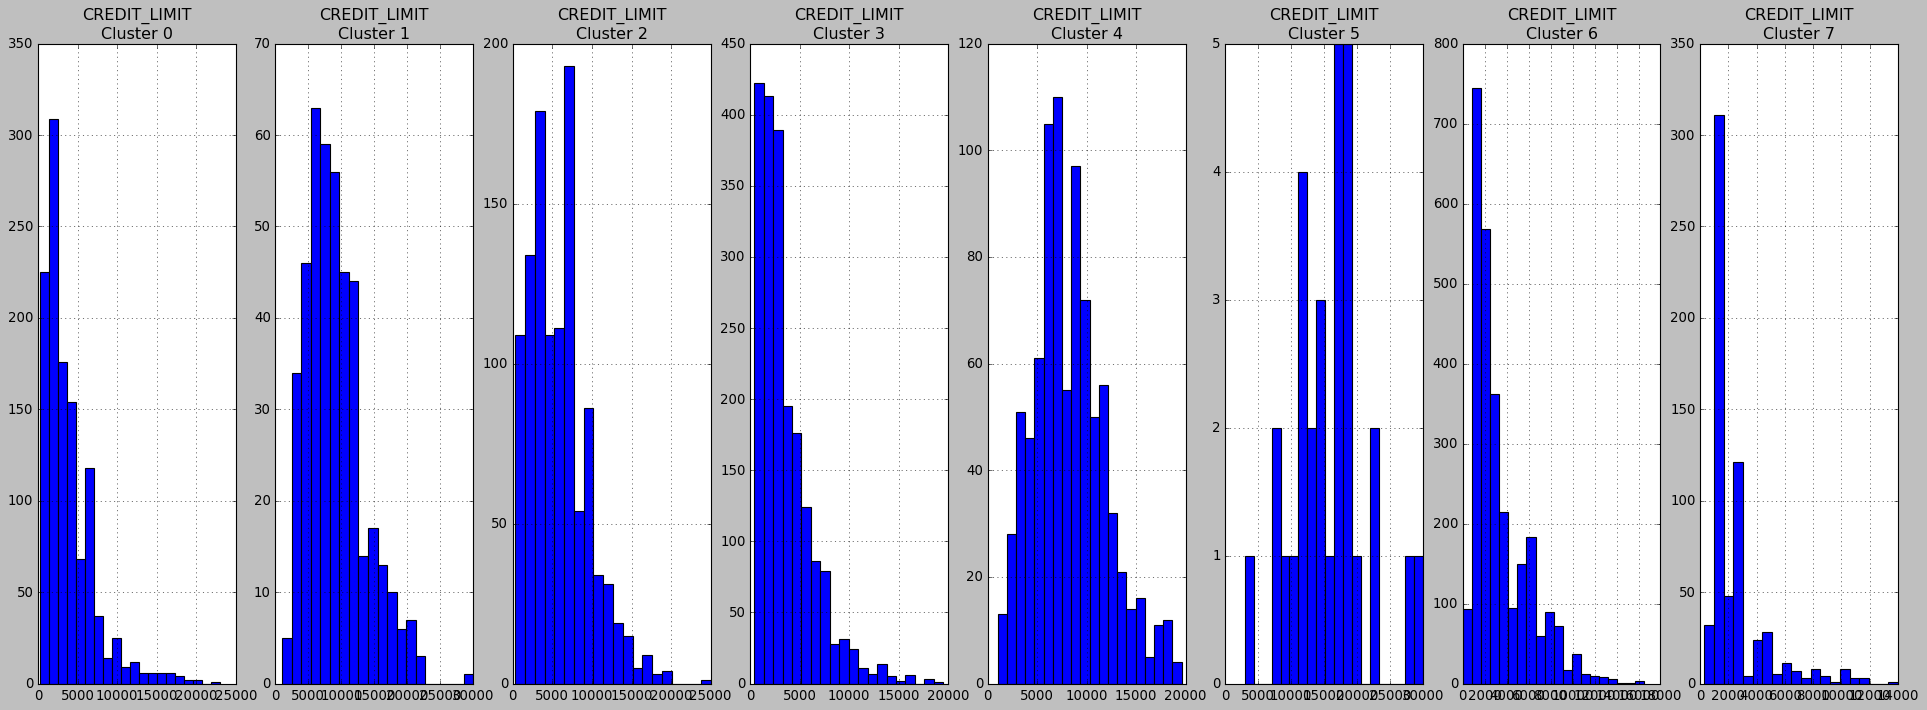

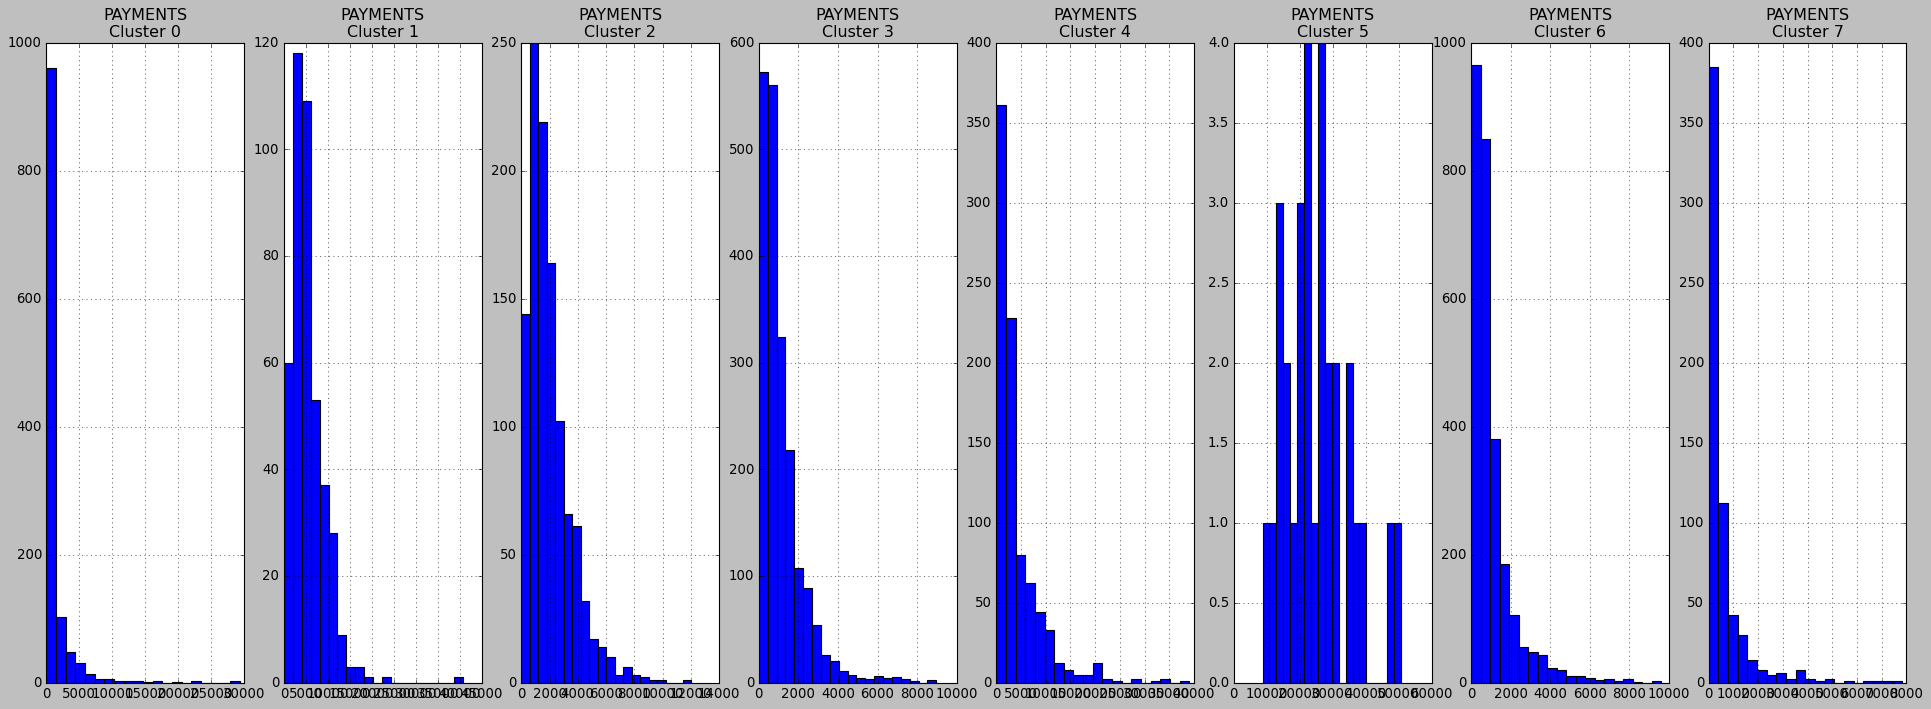

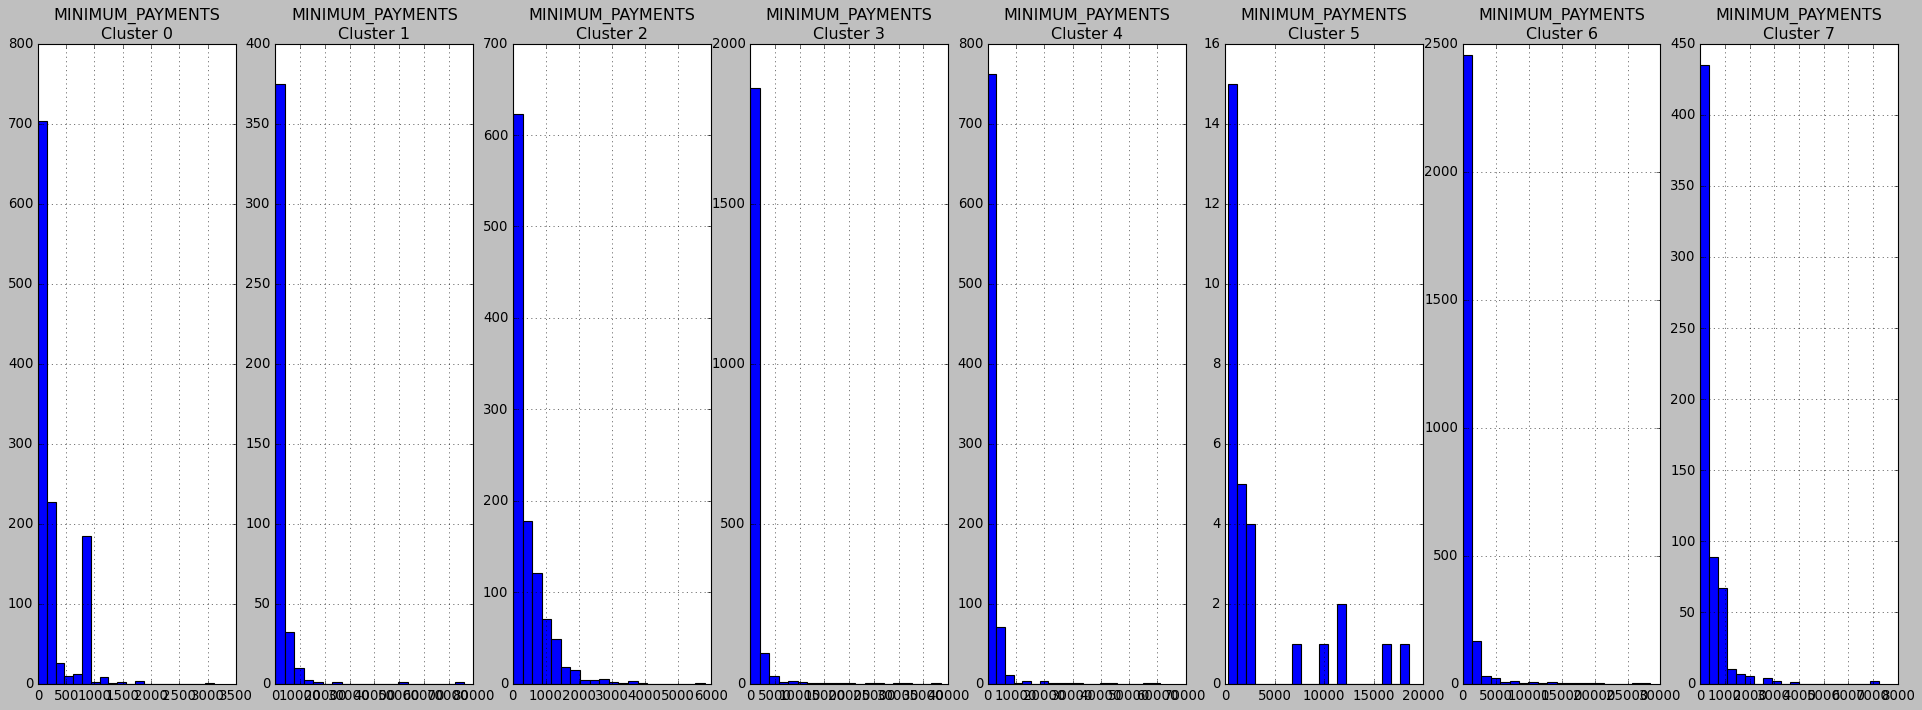

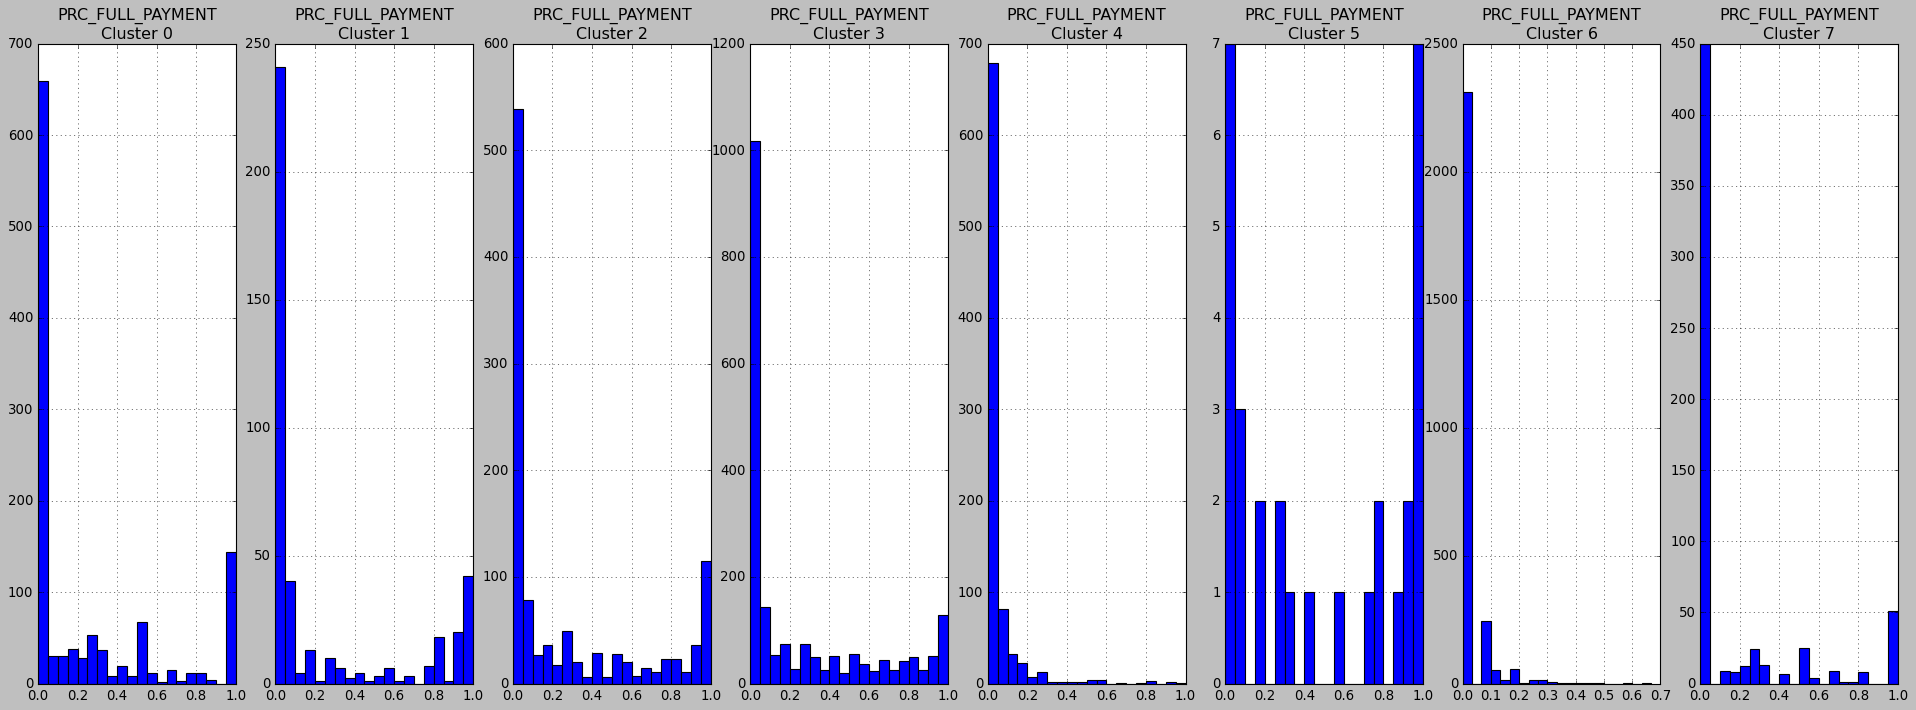

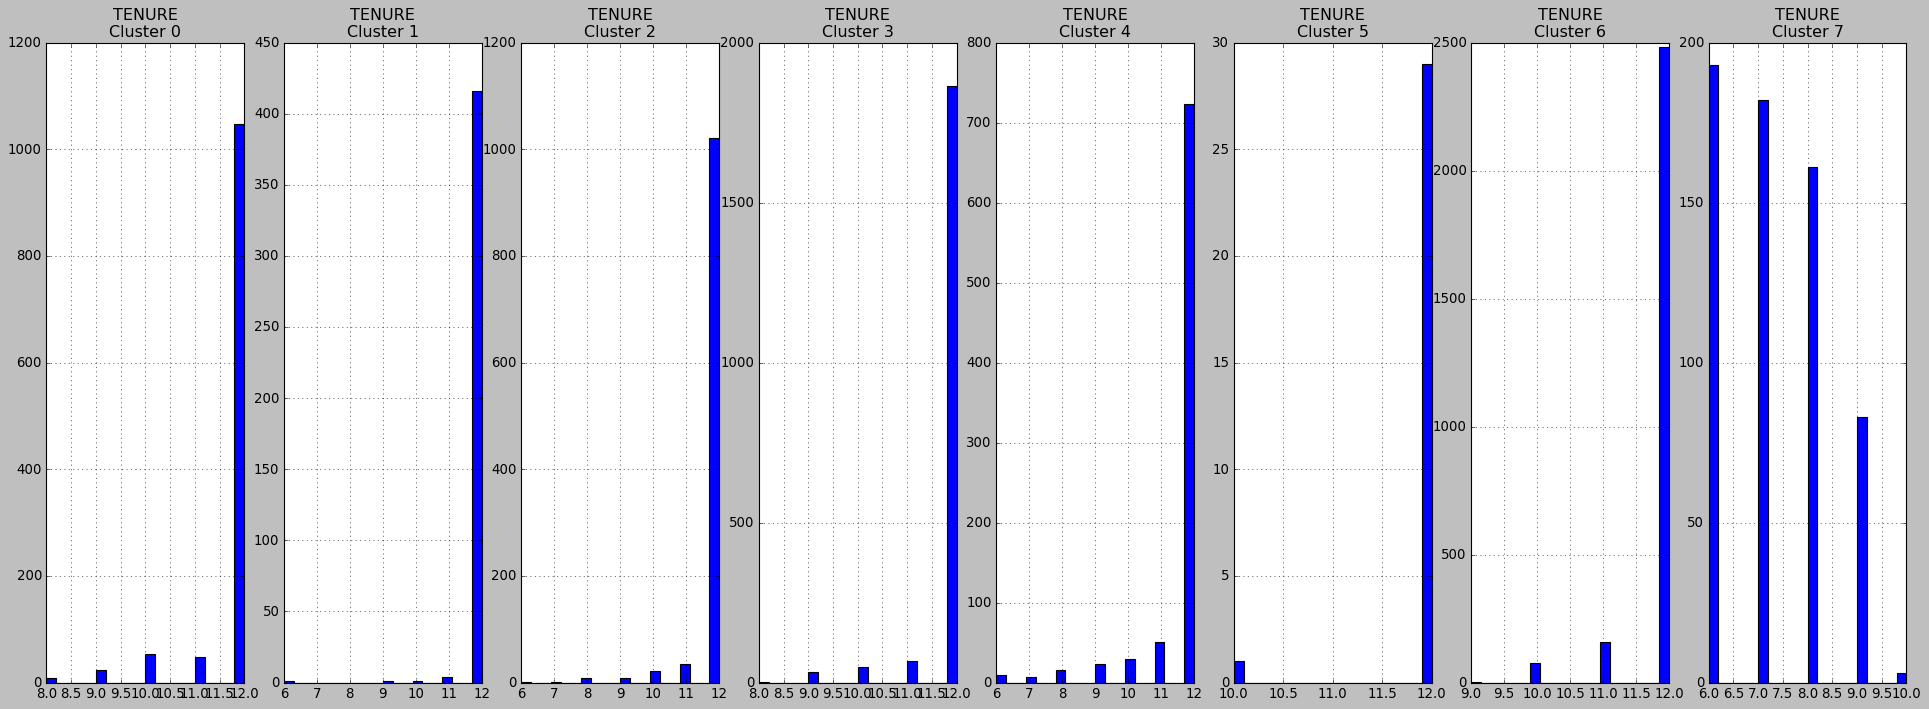

In [13]:
# We can visualize the clients data by clusters

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)

plt.style.use('classic')

for i in creditcard_df.columns:
  plt.figure(figsize = (30,10))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}\nCluster {}'.format(i,j))
plt.show()

### There are the different clusters
* First cluster: Low balance (~ 100 USD), low purchases, low cash advance.
* Second cluster: Medium balance (~ 800 USD), low tenure, low purchases.
* Third cluster: High balance (~ 5000 USD), high credit limit (~ 16000 USD), high purchases and high one off purchases.
* Fourth cluster: High balance (~ 5000 USD), high cash advance (~ 5000 USD), low purchase frequency, high cash advance frequency, high cash advance frequency and high credit limit (~ 8000 USD).
* Fifth cluster: Medium balance (~ 800 USD), high purchases frequency, high installments purchases, low cash advance.
* Sixth cluster: Medium balance (~ 1600 USD), low purchases, high cash advance.
* Seventh cluster: Medium balance (~ 1200 USD), high purchases, high one off purchases, low cash advance.
* Eighth cluster: High balance (~ 3500 USD), high purchases, high credit limit.

## Principal Components Analysis

In [14]:
# We are going to use PCA to visualize the clusters.
# We do the PCA in 2 components.
pca = PCA(n_components=2)

# Then we fit our scaled dataframe.
principal_comp = pca.fit_transform(creditcard_df_scaled)

# Then we add the 'labels' column from kmeans
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)

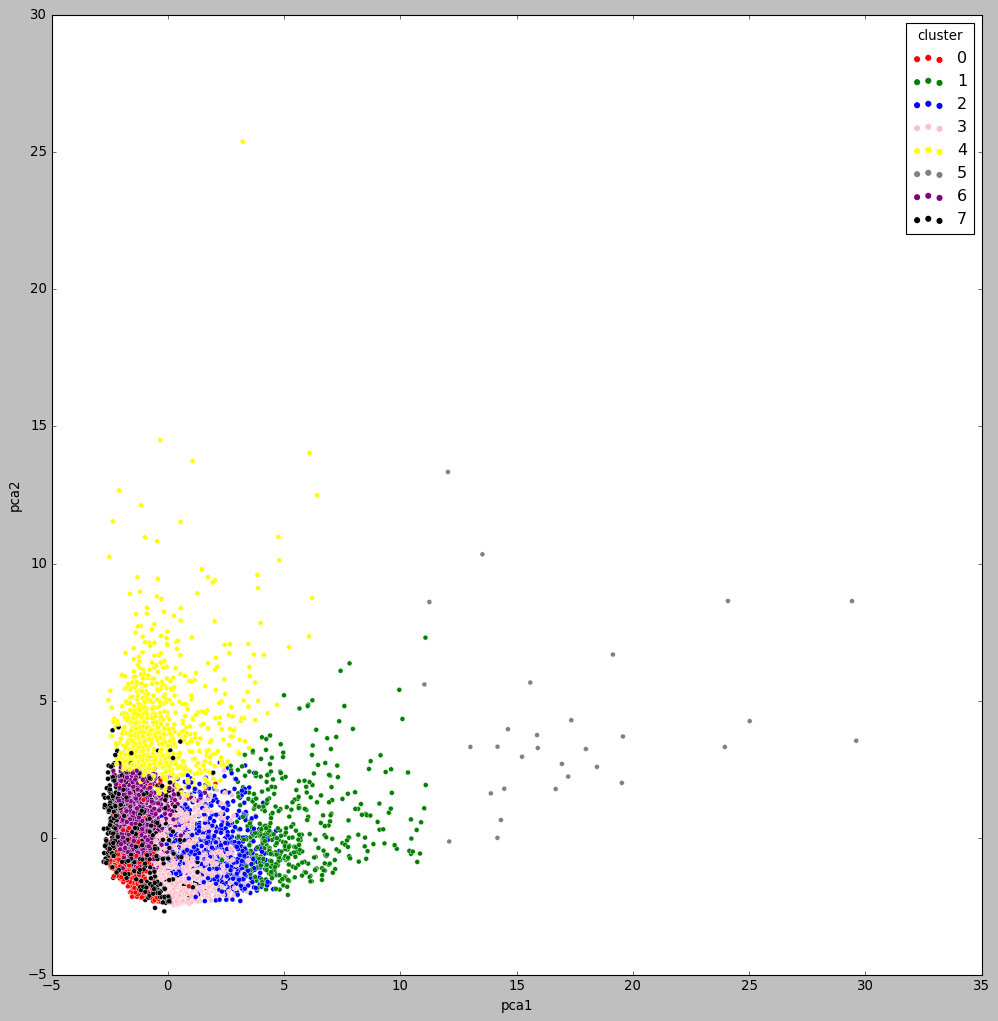

In [15]:
# Lets see the data in a plot
plt.figure(figsize=(15,15))
plt.style.use('classic')

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

plt.show()

## Autoencoders

In [16]:
# Start importing the libraries
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

# Lets make our encoding model

encoding_dim = 7

input_df = Input(shape = (17,))

x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)



autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [18]:
# Now we can fit the data in our autoencoder
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 33ms/step - loss: 0.6190
Epoch 2/25
70/70 [==============================] - 2s 34ms/step - loss: 0.3674
Epoch 3/25
70/70 [==============================] - 2s 34ms/step - loss: 0.2915
Epoch 4/25
70/70 [==============================] - 2s 34ms/step - loss: 0.2464
Epoch 5/25
70/70 [==============================] - 2s 35ms/step - loss: 0.2080
Epoch 6/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1796
Epoch 7/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1609
Epoch 8/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1497
Epoch 9/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1450
Epoch 10/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1340
Epoch 11/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1202
Epoch 12/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1176
Epoch 13/25
70/70 [==================

280/280 [==============================] - 1s 3ms/step


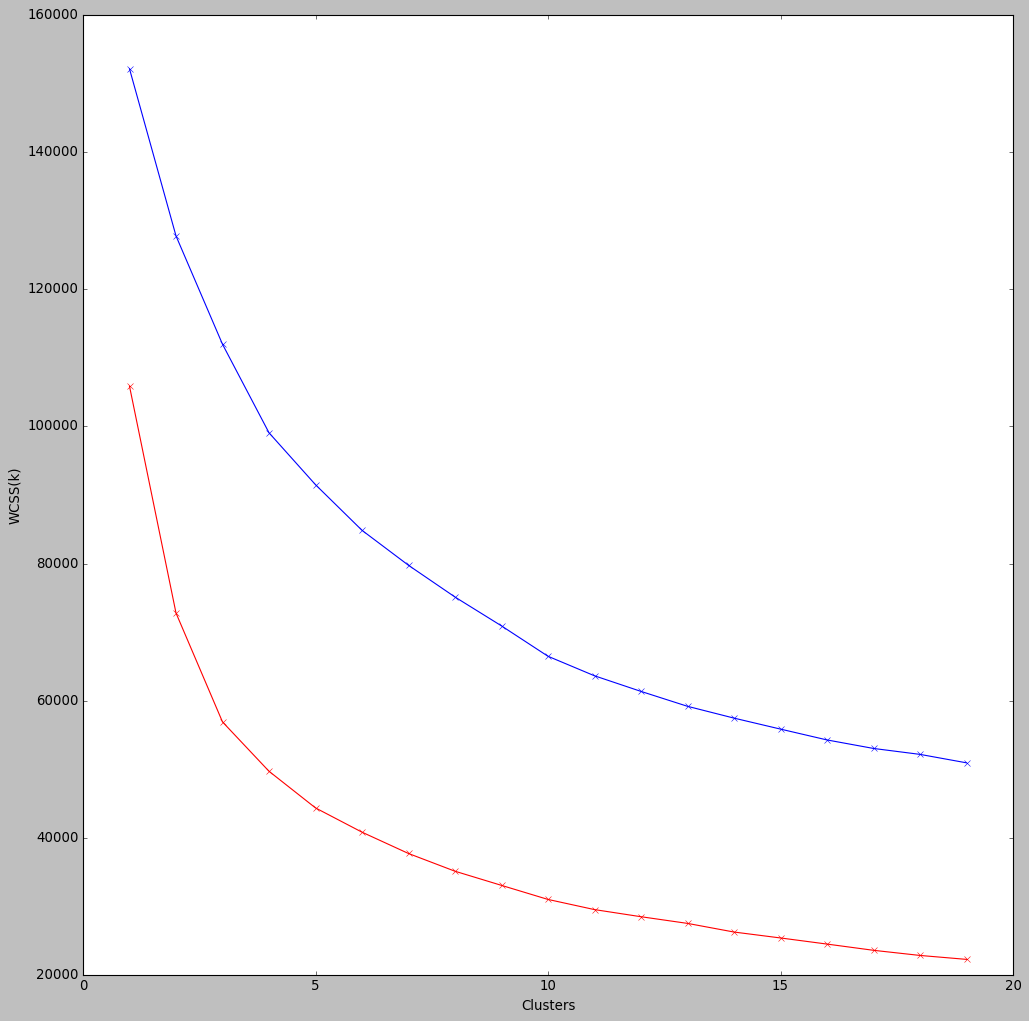

In [19]:
# Now we are doing KMeans with the encoded data.
# Starting with the elbow method.

pred = encoder.predict(creditcard_df_scaled)

scores_2 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

# We are plotting the old kmean scores (blue) and the new ones (red).

plt.figure(figsize=(15,15))
plt.style.use('classic')

plt.plot(range_values, scores_1, 'bx-', color = "b")
plt.plot(range_values, scores_2, 'bx-', color = "r")

plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [20]:
# From 4 clusters it is a straight line, so we are going to use 4 clusters.
kmeans = KMeans(4)

# Fit the kmeans with our encoded data
kmeans.fit(pred)

# Take the labels from the kmeans
labels_autoencoder = kmeans.labels_

# And add the labels column to our dataframe
creditcard_df_cluster_autoencoder = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels_autoencoder})], axis = 1)
creditcard_df_cluster_autoencoder.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [21]:
# Lets visualize using PCA again with 2 components.
pca_autoencoder = PCA(n_components=2)

# Then we fit our predicted dataframe.
princ_comp_autoencoder = pca_autoencoder.fit_transform(pred)

# Then we add the 'labels_autoencoder' column from kmeans
pca_df_autoencoder = pd.DataFrame(data = princ_comp_autoencoder, columns=["pca1", "pca2"])
pca_df_autoencoder = pd.concat([pca_df_autoencoder, pd.DataFrame({"cluster":labels_autoencoder})], axis = 1)
pca_df_autoencoder.head()

,pca1,pca2,cluster
0,-2.198445,-0.165608,0
1,-0.651827,1.567395,0
2,-1.165361,-0.955737,0
3,-2.073343,0.147203,0
4,-2.301357,-0.093962,0


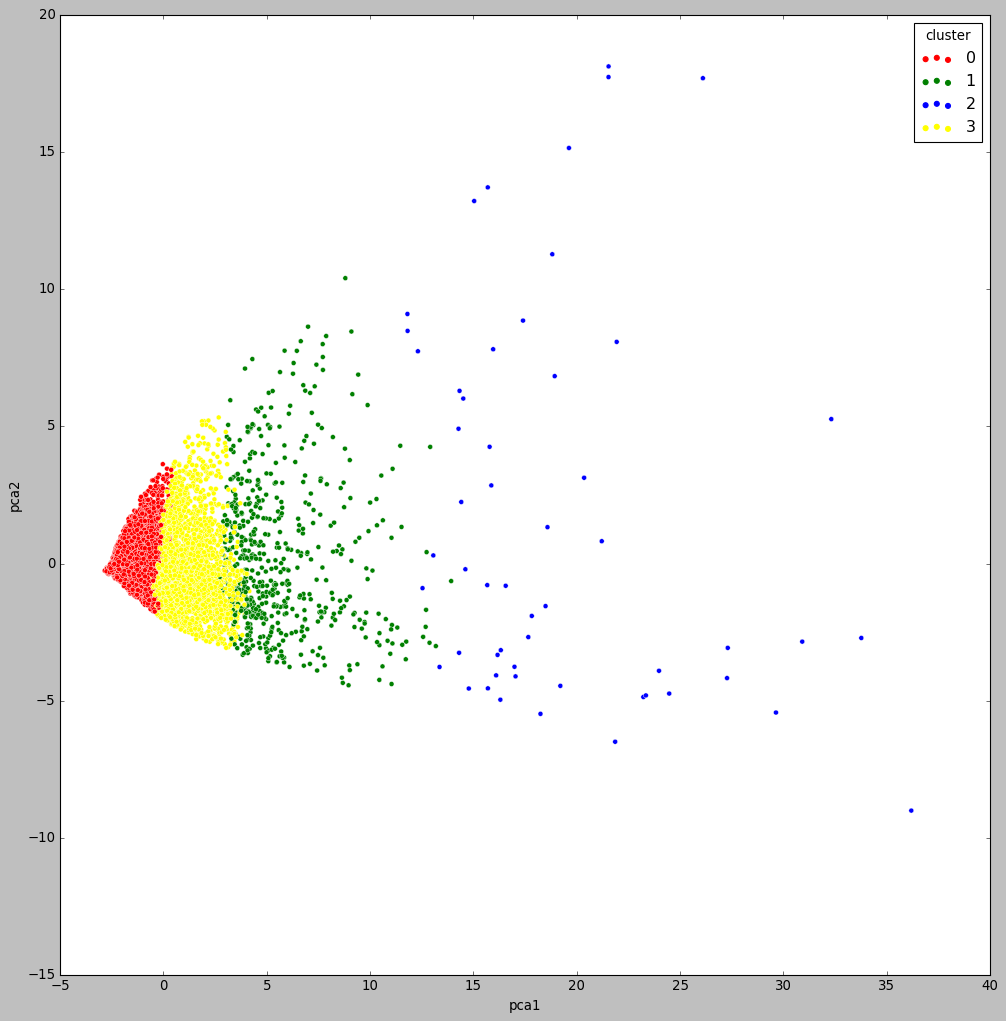

In [22]:
# Visualize or new data
plt.figure(figsize=(15,15))
plt.style.use('classic')

sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df_autoencoder, palette=["red", "green", "blue", "yellow"])
plt.show()